In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns
import requests as requests

sns.set_style("whitegrid")

In [2]:
from utils.eth_blocks_utils import get_block_for_timestamp

In [3]:
end_block = get_block_for_timestamp(int(datetime.datetime.utcnow().timestamp()))
end_block

13665109

In [4]:
start_block = get_block_for_timestamp(int((datetime.datetime.utcnow() - datetime.timedelta(days=100)).timestamp()))
start_block

13023636

In [5]:
crv_depositor_contract = "0x8014595F2AB54cD7c604B00E9fb932176fDc86Ae"

In [6]:
query = f"https://api.etherscan.io/api?module=account&action=txlist&address={crv_depositor_contract}&startblock={start_block}&endblock={end_block}&sort=asc&page=1&offset=10000&apikey={os.environ['ETHERSCAN_API_KEY']}"
etherscan_api_response = requests.post(query)

In [7]:
crv_depositor_txes = etherscan_api_response.json()['result']
len(crv_depositor_txes)

6147

In [8]:
dict_crv_depositor_txes = {'timestamp': [], 'gas_price': [], 'block_number': []}
for tx in crv_depositor_txes:

    dict_crv_depositor_txes['gas_price'].append(float(tx['gasPrice']) * 1e-9)
    dict_crv_depositor_txes['timestamp'].append(datetime.datetime.fromtimestamp(int(tx['timeStamp'])))
    dict_crv_depositor_txes['block_number'].append(datetime.datetime.fromtimestamp(int(tx['blockNumber'])))


In [9]:
df_crv_lock_txes = pd.DataFrame(dict_crv_depositor_txes)
df_crv_lock_txes.set_index('timestamp', inplace=True)
df_crv_lock_txes

,gas_price,block_number
timestamp,,
2021-08-14 15:53:09,31.000000,1970-05-31 18:41:07
2021-08-14 15:56:39,29.000000,1970-05-31 18:41:23
2021-08-14 16:09:11,39.000000,1970-05-31 18:42:13
2021-08-14 16:11:45,36.000000,1970-05-31 18:42:26
2021-08-14 16:11:45,36.000000,1970-05-31 18:42:26
...,...,...
2021-11-22 13:27:07,92.742456,1970-06-08 04:41:33
2021-11-22 13:27:47,91.070000,1970-06-08 04:41:37
2021-11-22 13:42:44,110.210870,1970-06-08 04:42:33


In [12]:
df_depositor_txes = pd.DataFrame()
df_depositor_txes['avg_gas'] = df_crv_lock_txes.groupby(pd.Grouper(freq='1D'))['gas_price'].mean()
df_depositor_txes['median_gas'] = df_crv_lock_txes.groupby(pd.Grouper(freq='1D'))['gas_price'].median()
df_depositor_txes['min_gas'] = df_crv_lock_txes.groupby(pd.Grouper(freq='1D'))['gas_price'].min()
df_depositor_txes['max_gas'] = df_crv_lock_txes.groupby(pd.Grouper(freq='1D'))['gas_price'].max()
df_depositor_txes['num_txes'] = df_crv_lock_txes.groupby(pd.Grouper(freq='1D'))['gas_price'].count()

df_depositor_txes

,avg_gas,median_gas,min_gas,max_gas,num_txes
timestamp,,,,,
2021-08-14,42.790909,40.000000,29.000000,65.000000,33
2021-08-15,31.629006,30.000000,22.000000,70.000000,135
2021-08-16,47.773214,44.500000,31.000000,81.000000,74
2021-08-17,43.184803,37.000000,25.000000,170.000000,71
2021-08-18,38.555201,34.000000,25.100000,103.000000,54
...,...,...,...,...,...
2021-11-18,120.652316,121.072517,73.122909,196.131551,46
2021-11-19,111.992488,110.707925,80.000000,182.178154,41
2021-11-20,88.326585,85.853494,61.658471,118.932073,72


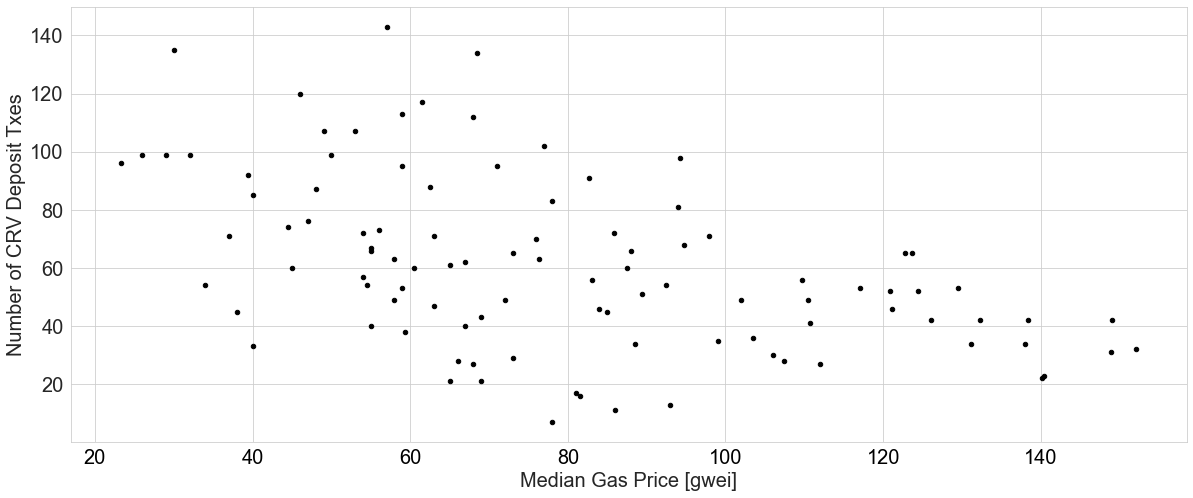

In [16]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.scatter(
    df_depositor_txes.median_gas,
    df_depositor_txes.num_txes,
    s=20,
    color='black',
)

ax.set_xlabel("Median Gas Price [gwei]", fontsize=20)
ax.set_ylabel("Number of CRV Deposit Txes", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')

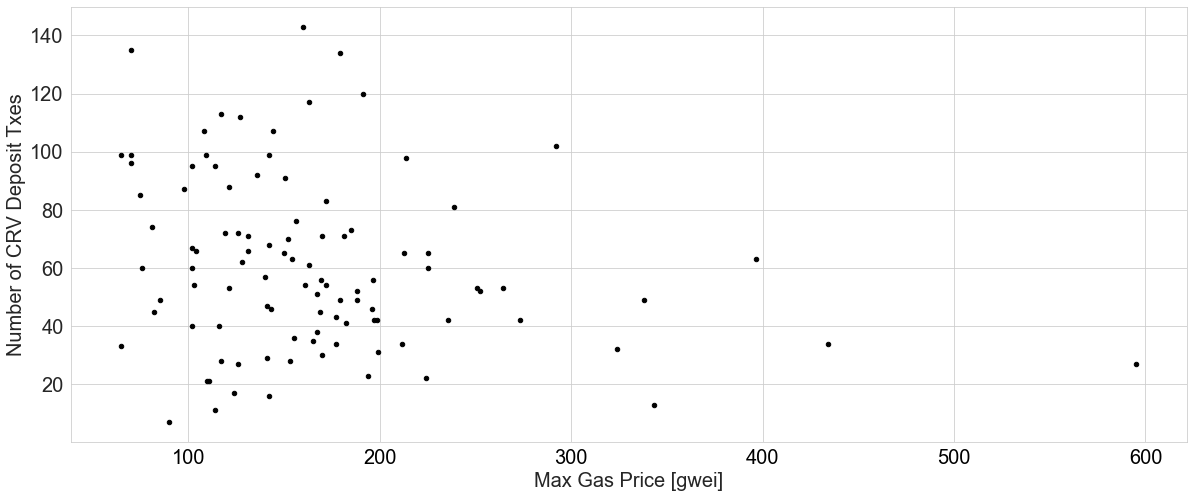

In [17]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.scatter(
    df_depositor_txes.max_gas,
    df_depositor_txes.num_txes,
    s=20,
    color='black',
)

ax.set_xlabel("Max Gas Price [gwei]", fontsize=20)
ax.set_ylabel("Number of CRV Deposit Txes", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')

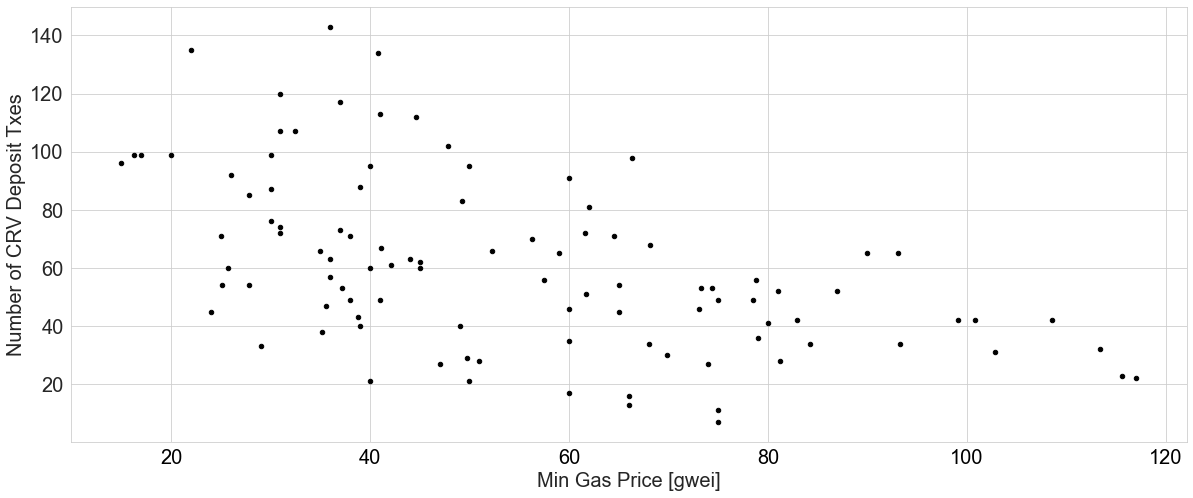

In [18]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.scatter(
    df_depositor_txes.min_gas,
    df_depositor_txes.num_txes,
    s=20,
    color='black',
)

ax.set_xlabel("Min Gas Price [gwei]", fontsize=20)
ax.set_ylabel("Number of CRV Deposit Txes", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')